In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Banking Dataset.csv')

In [3]:
df.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9
1,C10,1,41,M,84370.59,SELF-EMP,14,41-45,843,9
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19
4,C10000,0,43,M,97100.48,SENP,3,41-45,397,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         20000 non-null  object 
 1   Target          20000 non-null  int64  
 2   Age             20000 non-null  int64  
 3   Gender          20000 non-null  object 
 4   Balance         20000 non-null  float64
 5   Occupation      20000 non-null  object 
 6   No_OF_CR_TXNS   20000 non-null  int64  
 7   AGE_BKT         20000 non-null  object 
 8   SCR             20000 non-null  int64  
 9   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.5+ MB


In [5]:
df.shape

(20000, 10)

In [7]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = pd.Categorical(df[i]).codes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         20000 non-null  int16  
 1   Target          20000 non-null  int64  
 2   Age             20000 non-null  int64  
 3   Gender          20000 non-null  int8   
 4   Balance         20000 non-null  float64
 5   Occupation      20000 non-null  int8   
 6   No_OF_CR_TXNS   20000 non-null  int64  
 7   AGE_BKT         20000 non-null  int8   
 8   SCR             20000 non-null  int64  
 9   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int16(1), int64(5), int8(3)
memory usage: 1.0 MB


In [9]:
X = df.drop(['Cust_ID','Target'], axis=1)
y = df.pop('Target')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [28]:
rfc1 = RandomForestClassifier(n_estimators=501,
                              oob_score=True,
                              max_depth=10,
                              min_samples_leaf=50,
                              min_samples_split=150,
                              max_features=5)

In [29]:
rfc1 = rfc1.fit(X_train, y_train)

In [30]:
train_pred = rfc1.predict(X_train)
test_pred = rfc1.predict(X_test)

In [31]:
rfc1.oob_score

True

In [32]:
rfc1.oob_score_

0.9142857142857143

In [33]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

In [44]:
rfc1 = RandomForestClassifier()

In [45]:
gridsearch = GridSearchCV(estimator = rfc1, param_grid = grid, cv=3)

In [46]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [47]:
gridsearch.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [48]:
estimator = gridsearch.best_estimator_

In [49]:
train_pred = estimator.predict(X_train)
test_pred = estimator.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

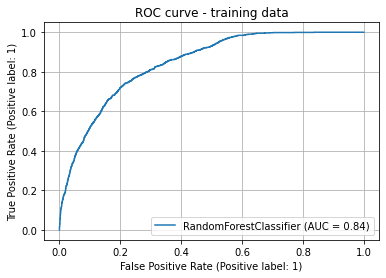

In [58]:
plot_roc_curve(estimator = estimator, X=X_train, y=y_train)
plt.title('ROC curve - training data')
plt.grid()

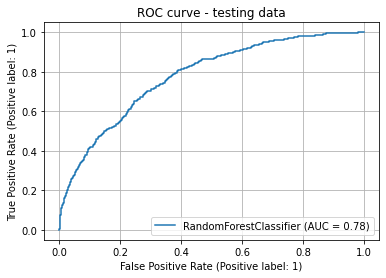

In [59]:
plot_roc_curve(estimator = estimator, X=X_test, y=y_test)
plt.title('ROC curve - testing data')
plt.grid()

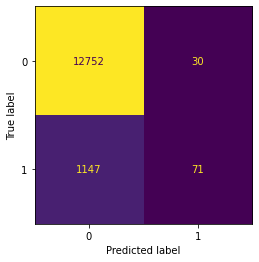

In [68]:
plot_confusion_matrix(estimator=estimator, X=X_train, y_true=y_train,colorbar=False)

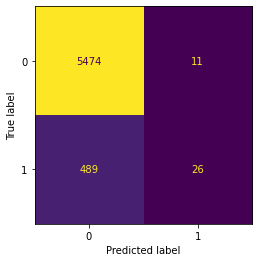

In [62]:
plot_confusion_matrix(estimator=estimator, X=X_test, y_true=y_test,colorbar=False)

In [69]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12782
           1       0.70      0.06      0.11      1218

    accuracy                           0.92     14000
   macro avg       0.81      0.53      0.53     14000
weighted avg       0.90      0.92      0.88     14000



In [70]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5485
           1       0.70      0.05      0.09       515

    accuracy                           0.92      6000
   macro avg       0.81      0.52      0.53      6000
weighted avg       0.90      0.92      0.88      6000

